Imports libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os

In [2]:
# Load preprocessing outputs
%run ./03_preprocessing_and_dataset_summary.ipynb

os.makedirs("results", exist_ok=True)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

Decision Tree Model

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1036
           1       0.71      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



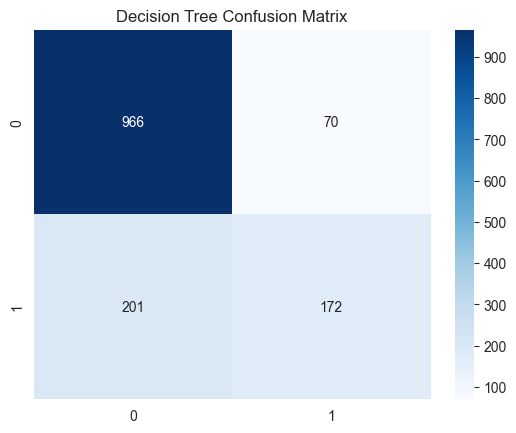

['results/decision_tree_model.pkl']

In [3]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Save model
joblib.dump(dt, "results/decision_tree_model.pkl")

Feature Importance

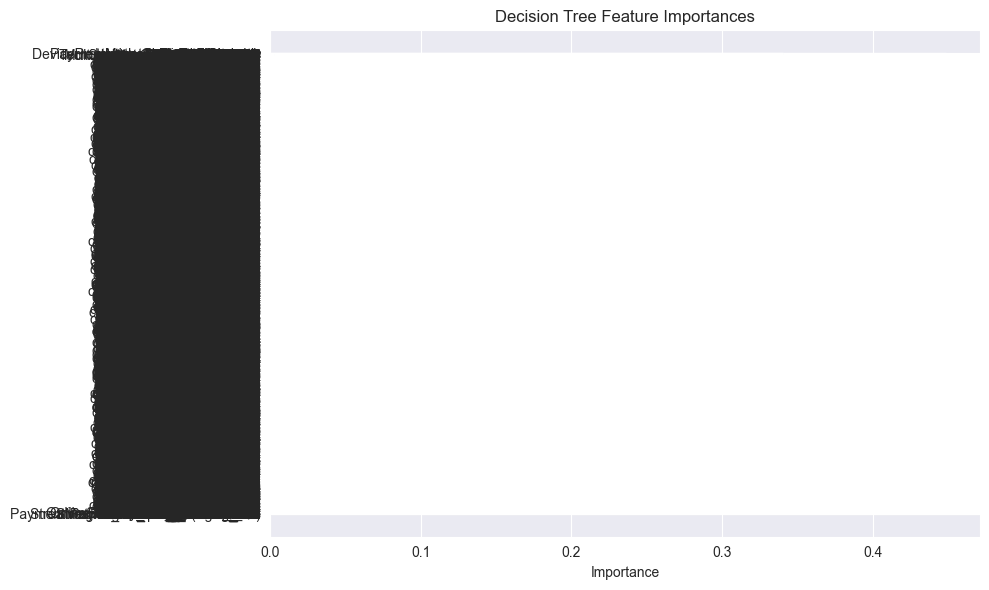

|--- tenure <= -0.65
|   |--- InternetService_Fiber optic <= 0.50
|   |   |--- tenure <= -1.18
|   |   |   |--- DeviceProtection_No internet service <= 0.50
|   |   |   |   |--- MonthlyCharges <= -0.15
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- MonthlyCharges >  -0.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- DeviceProtection_No internet service >  0.50
|   |   |   |   |--- TotalCharges <= -1.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  -1.00
|   |   |   |   |   |--- class: 0
|   |   |--- tenure >  -1.18
|   |   |   |--- TechSupport_No internet service <= 0.50
|   |   |   |   |--- TotalCharges <= -0.87
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TotalCharges >  -0.87
|   |   |   |   |   |--- class: 0
|   |   |   |--- TechSupport_No internet service >  0.50
|   |   |   |   |--- customerID_0568-ONFPC <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- customerID_0568-ONFPC >  0.50
|   |   |   |   |   |--- class: 1
| 

In [4]:
feature_importances = pd.DataFrame({
    'Feature': dt.feature_names_in_,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.to_csv("results/decision_tree_feature_importance.csv", index=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Export tree rules
tree_rules = export_text(dt, feature_names=dt.feature_names_in_)
print(tree_rules)